# Solving ODEs: Harmonic Oscillator
28th May 2018

Use odeint to solve the ODE for a harmonic oscillator with the following forces:

$$F_g = -mg$$
$$F_k = -kx$$
$$F_d = -kA\sin(\omega t)$$
$$F_a = -b_1 \dot x$$
$$F_2 = -b_2|\dot x|\dot x /m$$

In [1]:
import numpy as np
import scipy
import scipy.integrate
import matplotlib.pyplot as mpl

$$ \frac{d}{dt}\begin{bmatrix} x \\ \dot x \end{bmatrix} = \begin{bmatrix} \dot x \\ \frac{F}{m} \end{bmatrix}$$

In [4]:
# Some constants

k = 100 # (N.m^-1)
g = 9.81 # (m.s^-2)
m = 1 # (kg)
omega = 12 # (Hz)
timespan = np.linspace(0, 20, 1001) # Time-interval

In [5]:
# Define a series of forces

def F_g():
    return -m*g

def F_k(x):
    return -k*x

def F_d(t):
    return -k*A*np.sin(omega*t)

def F_1(x_dot):
    return -b1*x_dot

def F_2(x_dot):
    return -b2*abs(x_dot)*x_dot/m

In [6]:
# Define the state updating function (SUF)
# The state vector is "y"

def Next_State(y, t):
    dy = [y[1], F_g() + F_k(y[0]) + F_d(t) + F_1(y[1]) + F_2(y[1])]
    return np.asarray(dy)

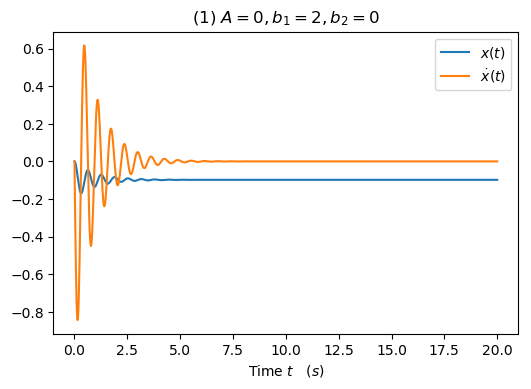

In [17]:
# The vector representing the initial state
y0 = [0, 0]
A = 0
b1 = 2
b2 = 0

# Solving this ODE
sol = scipy.integrate.odeint(Next_State, y0, timespan)

# Plot the positions and velocity as a function of time
Graph1 = mpl.figure(dpi=100)
mpl.plot(timespan, sol[:,0], label='$x(t)$')
mpl.plot(timespan, sol[:,1], label='$\dot x(t)$')
mpl.xlabel('Time $t \quad (s)$')
mpl.title('(1) $A=0, b_1=2, b_2=0$')
mpl.legend(loc='best')
mpl.show()

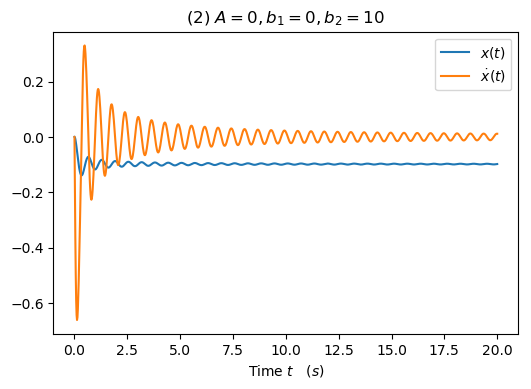

In [13]:
# The vector representing the initial state
y0 = [0, 0]
A = 0
b1 = 0
b2 = 10

# Solving this ODE
sol2 = scipy.integrate.odeint(Next_State, y0, timespan)

# Plot the positions and velocity as a function of time
Graph2 = mpl.figure(dpi=100)
mpl.plot(timespan, sol2[:,0], label='$x(t)$')
mpl.plot(timespan, sol2[:,1], label='$\dot x(t)$')
mpl.xlabel('Time $t \quad (s)$')
mpl.title('(2) $A=0, b_1=0, b_2=10$')
mpl.legend(loc='best')
mpl.show()

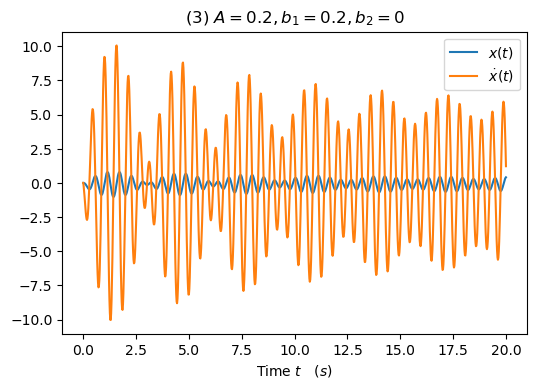

In [14]:
# The vector representing the initial state
y0 = [0, 0]
A = 0.2
b1 = 0.2
b2 = 0

# Solving this ODE
sol3 = scipy.integrate.odeint(Next_State, y0, timespan)

# Plot the positions and velocity as a function of time
Graph3 = mpl.figure(dpi=100)
mpl.plot(timespan, sol3[:,0], label='$x(t)$')
mpl.plot(timespan, sol3[:,1], label='$\dot x(t)$')
mpl.xlabel('Time $t \quad (s)$')
mpl.title('(3) $A=0.2, b_1=0.2, b_2=0$')
mpl.legend(loc='best')
mpl.show()

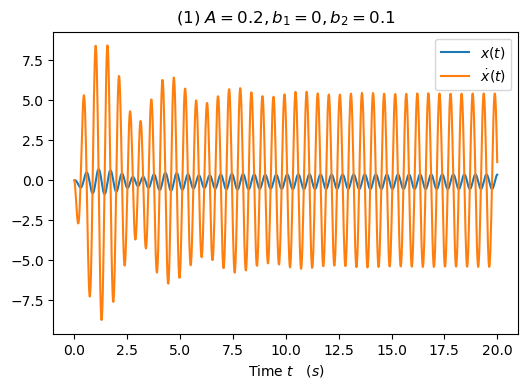

In [18]:
# The vector representing the initial state
y0 = [0, 0]
A = 0.2
b1 = 0
b2 = 0.1

# Solving this ODE
sol4 = scipy.integrate.odeint(Next_State, y0, timespan)

# Plot the positions and velocity as a function of time
Graph4 = mpl.figure(dpi=100)
mpl.plot(timespan, sol4[:,0], label='$x(t)$')
mpl.plot(timespan, sol4[:,1], label='$\dot x(t)$')
mpl.xlabel('Time $t \quad (s)$')
mpl.title('(1) $A=0.2, b_1=0, b_2=0.1$')
mpl.legend(loc='best')
mpl.show()

### A Comparision Between `odeint` and `ode`

Let me make it clear, they are both old-style functions...

`odeint` is "_an integrator with a simpler interface based on lsoda from ODEPACK_"

while `ode` is "_a more object-oriented integrator based on VODE_".

In [12]:
def Next_State_tFirst(t, y):
    return Next_State[y, t]

In [90]:
# Instantiate a ODE using "scipy.integrate.ode"
Dy = ode(f)
Dy.set_integrator('vode',method='bdf')
Dy.set_initial_value(y0, t0)

while Dy.successful() and 


SyntaxError: invalid syntax (<ipython-input-90-ceb872a631c7>, line 6)